In [1]:
# import sys
# !{sys.executable} -m pip install librosa
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data_mfcc.csv')

In [4]:
df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-424.469330,237.982895,6.731316,-3.202654,14.532297,-7.691171,-5.938550,1.828542,0.126493,-1.419745,...,-15.246060,-15.932623,-5.570814,3.378149,3.227192,-0.593816,-2.097961,-2.741678,-3.434451,piano
1,-420.475647,230.228104,8.183341,0.445985,23.258064,4.189878,2.004561,3.607440,-1.887056,-3.405439,...,-10.857403,-14.574149,-10.775605,-6.764171,-3.649573,-1.686252,-3.082775,-4.791152,-5.136883,piano
2,-391.824371,259.276093,12.752640,-20.452869,12.685456,-1.488779,-6.005210,2.188318,-3.297070,-7.162425,...,1.544302,-1.582307,-6.687898,-7.898934,-5.066751,-4.520948,-6.353752,-5.899755,-2.472929,piano
3,-510.576508,229.395294,25.448526,-4.467762,6.040303,2.116656,-4.205454,-14.291451,-13.079196,-5.157303,...,-0.368388,6.425932,10.205118,6.254388,-0.309801,-7.568224,-10.515248,-7.098872,-3.438269,piano
4,-456.584351,236.038055,19.959612,-10.859509,13.760965,0.094559,-6.522711,-5.254314,-5.966574,-4.693297,...,-8.892569,-8.372187,-11.724998,-9.395949,-2.991619,-2.811136,-1.716639,1.816594,-0.005441,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,-126.718475,211.123215,-64.388329,23.175159,28.375416,-1.169698,-7.720967,-0.532982,-5.889307,0.242725,...,-3.405693,-3.522162,-6.648514,-3.480645,-2.026061,-5.091410,-3.487913,-2.062895,-8.505610,cello
2322,-204.178101,220.853699,-68.285461,23.857170,31.525501,-2.056592,-11.131469,0.404449,-9.312475,2.372316,...,-2.582308,-4.884126,-8.726199,-6.733187,-5.179200,-8.332076,-4.879526,1.666614,-6.768103,cello
2323,-326.542847,173.090546,-17.896770,30.417681,-8.306487,17.857340,-14.968207,5.607214,-2.909435,0.612115,...,-1.316044,-4.523128,-5.320628,-4.571884,-4.474178,-1.919236,-4.339386,-4.252269,-4.650919,cello
2324,-314.654755,185.361542,-8.490097,30.651144,-12.311681,22.408638,-7.582389,17.190226,3.917881,5.292466,...,4.141909,1.527676,-4.503474,-3.744816,-2.940274,-0.587636,-2.860113,-0.713387,-3.248610,cello


In [5]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

for i in range(20):
    reshaped = np.array(df[str(i)]).reshape(-1, 1)
    df[str(i)] = scaler.fit_transform(reshaped)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-0.897049,1.648863,0.578732,-1.204811,0.582083,-1.322437,-0.067308,-0.126290,0.615557,-0.201390,...,-1.806189,-1.746684,-0.517352,0.849738,0.908948,0.233492,0.021203,-0.327577,-0.298903,piano
1,-0.863538,1.429153,0.623365,-1.045911,1.106229,-0.474965,0.703220,0.040502,0.351237,-0.442543,...,-1.204803,-1.543959,-1.293078,-0.686028,-0.187274,0.057648,-0.148412,-0.696609,-0.608647,piano
2,-0.623121,2.252145,0.763817,-1.956067,0.471145,-0.880022,-0.073775,-0.092557,0.166144,-0.898811,...,0.494626,0.394815,-0.683843,-0.857856,-0.413186,-0.398639,-0.711777,-0.896226,-0.123961,piano
3,-1.619586,1.405558,1.154068,-1.259907,0.071978,-0.622847,0.100812,-1.637731,-1.117963,-0.655298,...,0.232526,1.589886,1.833903,1.285262,0.345118,-0.889143,-1.428516,-1.112141,-0.299597,piano
4,-1.166531,1.593762,0.985348,-1.538271,0.535750,-0.767083,-0.123975,-0.790392,-0.184284,-0.598947,...,-0.935558,-0.618439,-1.434576,-1.084536,-0.082390,-0.123419,0.086879,0.493195,0.324979,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,1.601419,0.887871,-1.607369,-0.056044,1.413623,-0.857262,-0.240213,-0.347711,-0.174141,0.000509,...,-0.183681,0.105330,-0.677973,-0.188831,0.071529,-0.490463,-0.218190,-0.205354,-1.221560,cello
2322,0.951444,1.163557,-1.727161,-0.026342,1.602845,-0.920524,-0.571052,-0.259816,-0.623503,0.259138,...,-0.070851,-0.097915,-0.987633,-0.681336,-0.431111,-1.012097,-0.457869,0.466189,-0.905434,cello
2323,-0.075335,-0.189675,-0.178295,0.259371,-0.789817,0.499933,-0.943238,0.228005,0.217029,0.045370,...,0.102667,-0.044044,-0.480064,-0.354068,-0.318724,0.020146,-0.364840,-0.599576,-0.520229,cello
2324,0.024420,0.157988,0.110850,0.269539,-1.030404,0.824576,-0.226770,1.314049,1.113255,0.613776,...,0.850581,0.858919,-0.358275,-0.228832,-0.074205,0.234487,-0.110063,0.037641,-0.265090,cello


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

In [8]:
test_set['label'].value_counts() / len(test_set)

piano              0.309013
acoustic_guitar    0.274678
violin             0.248927
cello              0.167382
Name: label, dtype: float64

In [9]:
test_set.shape, train_set.shape

((466, 21), (1860, 21))

In [10]:
X_train = train_set.drop(['label'], axis=1)
y_train = pd.DataFrame(data=train_set["label"].copy(), columns=['label'])

In [11]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2146,-0.661846,0.612410,0.279005,-1.048350,0.825719,-0.190457,-0.793781,-1.530596,0.256258,-0.284033,-0.440639,-1.263967,-1.254092,-1.082924,-1.074404,-1.172552,-0.149578,0.142011,-0.788948,-1.215978
1472,-1.922252,0.292645,1.740288,-0.650523,1.077952,0.711669,1.823562,0.373177,0.748341,-0.487877,-0.513463,-0.940232,0.031171,0.517950,0.051241,-0.711407,-0.172429,0.626825,-0.135055,-0.319146
2307,2.118741,-1.003487,-1.133666,1.218908,-1.108069,1.909438,0.070728,0.690648,0.862172,1.457760,0.493494,0.774026,0.414634,0.096931,0.636146,0.072623,0.798905,0.279149,0.513700,0.315871
287,-0.380373,1.741804,-0.426302,-0.853886,1.102576,-1.143439,1.035384,-0.525891,-0.462977,-0.349719,-0.043697,-0.334326,-0.363554,-0.665270,-0.126929,-0.107563,-0.016193,0.131541,-0.265789,-0.015098
635,1.603128,0.502856,-1.110737,0.695850,-0.670694,0.436243,0.739122,0.081982,0.293098,-0.012348,0.907142,-0.065258,0.582744,0.354248,0.096094,-0.392809,0.216633,0.042246,-0.383491,-1.205494


In [12]:
y_train.head()

,label
2146,cello
1472,acoustic_guitar
2307,cello
287,piano
635,piano


In [13]:
from sklearn.preprocessing import OneHotEncoder

label_encoder = OneHotEncoder()
labels_enc = label_encoder.fit(y_train)

In [14]:
labels_enc

OneHotEncoder()

In [15]:
label_encoder.categories_

[array(['acoustic_guitar', 'cello', 'piano', 'violin'], dtype=object)]

In [16]:
y_train = label_encoder.transform(y_train)

In [17]:
y_train = pd.DataFrame(y_train.toarray())

In [18]:
y_train

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1855,0.0,1.0,0.0,0.0
1856,0.0,0.0,0.0,1.0
1857,0.0,0.0,0.0,1.0
1858,0.0,0.0,1.0,0.0


In [19]:
X_test = test_set.drop(['label'], axis=1)
y_test = pd.DataFrame(data=test_set["label"].copy(), columns=['label'])
y_test = label_encoder.transform(y_test)
y_test = pd.DataFrame(y_test.toarray())

In [20]:
# models

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score 

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [24]:
# display_labels = ['piano','violin']
display_labels = label_encoder.categories_[0]
display_labels

array(['acoustic_guitar', 'cello', 'piano', 'violin'], dtype=object)

In [25]:
# mlp

In [26]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(max_iter=8000)

# parameters_mlp = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive'],
# }

# grid_mlp = GridSearchCV(model_mlp, parameters_mlp, scoring=make_scorer(accuracy_score))
# grid_mlp.fit(X_train, y_train)

# model_mlp = grid_mlp.best_estimator_

model_mlp=MLPClassifier(activation= 'relu',
 alpha= 0.0001,
 hidden_layer_sizes= (50, 50),
 learning_rate= 'adaptive',
 solver= 'adam', max_iter=8000)

model_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), learning_rate='adaptive',
              max_iter=8000)

In [27]:
# grid_mlp.best_params_

In [28]:
# train

In [29]:
cv_score_mlp_train = cross_val_score(model_mlp, X_train, y_train, cv=5, scoring='accuracy')
cv_score_mlp_train

array([0.63978495, 0.66397849, 0.65053763, 0.67204301, 0.67473118])

In [30]:
print('Accuracy cross validation Multi-Layer Perceptron Train:', cv_score_mlp_train.mean())

Accuracy cross validation Multi-Layer Perceptron Train: 0.6602150537634408


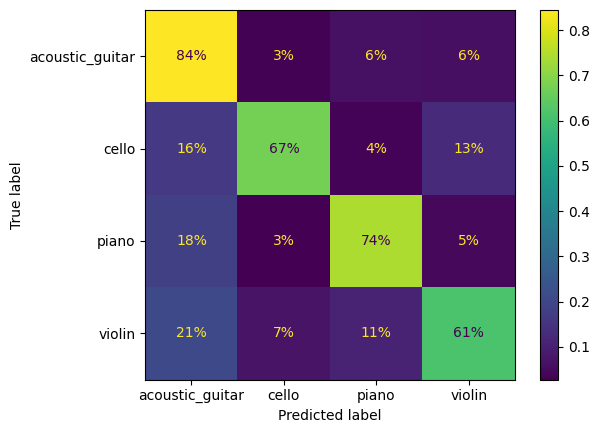

In [31]:
y_train_pred_mlp = cross_val_predict(model_mlp, X_train, y_train, cv=5)
ConfusionMatrixDisplay.from_predictions(y_train.values.argmax(axis=1), y_train_pred_mlp.argmax(axis=1), normalize='true', values_format='.0%', display_labels=display_labels)
plt.show()

In [32]:
# test

In [33]:
cv_score_mlp_test = cross_val_score(model_mlp, X_test, y_test, cv=5, scoring='accuracy')
cv_score_mlp_test

array([0.64893617, 0.52688172, 0.55913978, 0.48387097, 0.49462366])

In [34]:
print('Accuracy cross validation Multi-Layer Perceptron Test:', cv_score_mlp_test.mean())

Accuracy cross validation Multi-Layer Perceptron Test: 0.5426904598490048


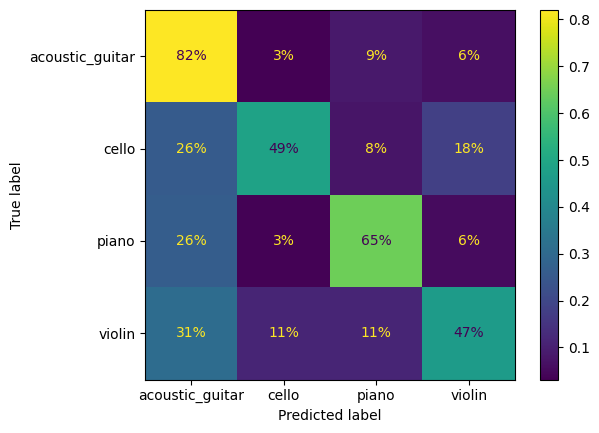

In [35]:
y_test_pred_mlp = cross_val_predict(model_mlp, X_test, y_test, cv=5)
ConfusionMatrixDisplay.from_predictions(y_test.values.argmax(axis=1), y_test_pred_mlp.argmax(axis=1), normalize='true', values_format='.0%', display_labels=display_labels)
plt.show()

In [36]:
model_name = 'Multi-Layer Perceptron Test'
average = 'macro'

accuracy_score_mlp_test = accuracy_score(y_test, y_test_pred_mlp)
precision_score_mlp_test = precision_score(y_test, y_test_pred_mlp, average=average)
f1_score_mlp_test = f1_score(y_test, y_test_pred_mlp, average=average)
recall_score_mlp_test = recall_score(y_test, y_test_pred_mlp, average=average)

print(f'Accuracy {model_name}:', accuracy_score_mlp_test)
print(f'Precision {model_name}:', precision_score_mlp_test)
print(f'F1 score {model_name}:', f1_score_mlp_test)
print(f'Recall score {model_name}:', recall_score_mlp_test)

Accuracy Multi-Layer Perceptron Test: 0.5536480686695279
Precision Multi-Layer Perceptron Test: 0.6679680593068431
F1 score Multi-Layer Perceptron Test: 0.629125275429205
Recall score Multi-Layer Perceptron Test: 0.5967035762967875


In [37]:
re = classification_report(y_test, y_test_pred_mlp, target_names=display_labels, zero_division=0.0)

print(re)

                 precision    recall  f1-score   support

acoustic_guitar       0.66      0.65      0.65       128
          cello       0.63      0.49      0.55        78
          piano       0.73      0.67      0.70       144
         violin       0.65      0.58      0.61       116

      micro avg       0.68      0.61      0.64       466
      macro avg       0.67      0.60      0.63       466
   weighted avg       0.67      0.61      0.64       466
    samples avg       0.58      0.61      0.59       466

